In [49]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# s = 0
# b = 1
observatii = np.array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [51]:
with pm.Model() as model:
    
    # a priori: distributie beta
    alfa = 1
    beta = 1
    n = pm.Beta("n", alpha=1, beta=1)
    p = pm.Normal("p", mu=0.5, sigma=1)
    X_obs = pm.Beta("beta", alpha=alfa, beta=beta)
    k_obs = pm.Binomial("k_obs", n=10, p=p, observed=observatii)
    
    print(k_obs)
    # # Priori pentru μ și σ
    # mu = pm.Normal("mu", mu=58, sigma=10)  # μ ~ N(58, 10^2)
    # 
    # sigma = pm.HalfNormal("sigma", sigma=10)  # σ ~ HalfNormal(10)
    # 
    # # Distribuția pentru observații
    # X_obs = pm.Normal("X_obs", mu=mu, sigma=sigma, observed=observatii)

    # Eșantionare
    # trace = pm.sample(2000, tune=1000, random_seed=42)
    
with model:
    # pm.sample creeaza esantioane aleatorii din distributia a posteriori a parametrilor modelului
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

k_obs


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Dani\Desktop\uaic\pmp\PMP-2024\Partial\.venv\Lib\site-packages\pytensor\tensor\elemwise.py:734: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Dani\Desktop\uaic\pmp\PMP-2024\Partial\.venv\Lib\site-packages\pytensor\tensor\elemwise.py:734: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Dani\Desktop\uaic\pmp\PMP-2024\Partial\.venv\Lib\site-packages\pytensor\tensor\elemwise.py:734: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Dani\Desktop\uaic\pmp\PMP-2024\Partial\.venv\Lib\site-packages\pytensor\tensor\elemwise.py:734: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Dani\Desktop\uaic\pmp\PMP-2024\Partial\.venv\Lib\site-packages\pytensor\tensor\elemwise.py:734: Runtime

Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 20 seconds.
There were 31 divergences after tuning. Increase `target_accept` or reparameterize.


In [52]:
import arviz as az

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
n,0.498,0.290,0.000,0.941,0.003,0.002,7853.0,4960.0,1.0
p,0.079,0.027,0.032,0.128,0.000,0.000,7304.0,5104.0,1.0


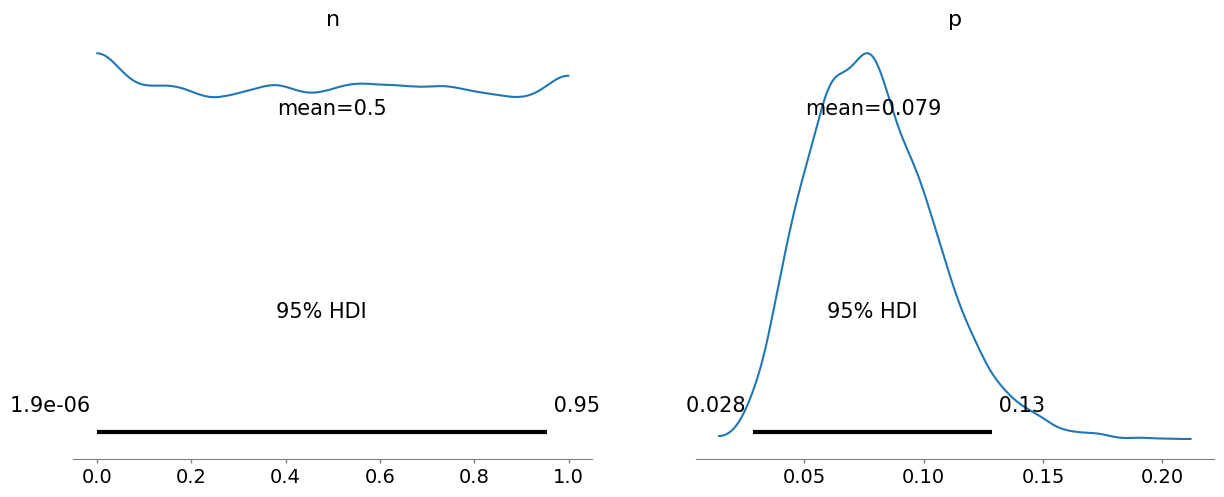

In [53]:
# Vizualizarea rezultatelor
az.plot_posterior(trace, var_names=["n", "p"], hdi_prob=0.95)
az.summary(trace, var_names=["n", "p"])